In [9]:
#https://s3.amazonaws.com/hackerday.datascience/118/train.csv
#https://s3.amazonaws.com/hackerday.datascience/118/test.csv

In [10]:
# Image classification

# Get all the images

# Parse the images and store the pixels in structured data format

# remove noise, if present

# create models to learn the pattern 

In [11]:
# Tea leafs classification

# The tea leafs comes through various cartons and with different batches

# one individual does a manual inspection

# then labeling happens by sampling exercise

# High, medium and low quality of leafs that comes to the manufacturer

# different tea leafs fetch a differential pricing

In [ ]:
# Disease classification in plant leafs

# each disease in plants have some unique pattern

# can we classify them

# can we predict them

In [12]:
# set of images

# algorithms

# prediction real time or batch mode

In [13]:
# extraction of pixels and grey scale conversion, that translates the images into a structured data file

# by two libraries in Python

# scipy library

# sklearn

In [ ]:
# we do not neeed to parse the images

In [ ]:
# the data set stored in train and test file as below:

In [14]:
# training algorithms

# Scalable training algorithms if the image is of high pixel size

# base algorithms if the image is of low pixel size

In [16]:
# for large pixel size and high dimensional data, CNN, convolutional neural network

# First set of pixxels

# apply convolutional layer

# represent in another layer

# apply another convolution

# reduce the representation

# apply convolution

# manageable size and then train a neural network to solve this

# tensorflow, pytorch, azure, GPU processing would be required, if the size of training set is huge

In [17]:
# if the pixel size is low

# use algos from sklearn and scipy to perform classification

In [ ]:
# keras: theano, tensorflow

In [ ]:
# 


    train.csv - the training set
    test.csv - the test set
    sample_submission.csv - a sample submission file in the correct format
    images - the image files (each image is named with its corresponding id)



    id - an anonymous id unique to an image
    margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
    shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
    texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature


In [273]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [274]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [275]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

In [276]:
train = pd.read_csv('https://s3.amazonaws.com/hackerday.datascience/118/train.csv')
test = pd.read_csv('https://s3.amazonaws.com/hackerday.datascience/118/test.csv')

In [277]:
# Data Preparation

In [278]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [279]:
train.species.value_counts()

Rhododendron_x_Russellianum     10
Ilex_Aquifolium                 10
Acer_Circinatum                 10
Magnolia_Heptapeta              10
Quercus_Shumardii               10
Quercus_Greggii                 10
Ilex_Cornuta                    10
Quercus_Palustris               10
Alnus_Rubra                     10
Lithocarpus_Cleistocarpus       10
Lithocarpus_Edulis              10
Quercus_Infectoria_sub          10
Tilia_Tomentosa                 10
Quercus_Alnifolia               10
Quercus_Brantii                 10
Fagus_Sylvatica                 10
Magnolia_Salicifolia            10
Olea_Europaea                   10
Eucalyptus_Glaucescens          10
Alnus_Cordata                   10
Acer_Opalus                     10
Quercus_Castaneifolia           10
Quercus_Dolicholepis            10
Tilia_Platyphyllos              10
Quercus_Trojana                 10
Alnus_Viridis                   10
Betula_Pendula                  10
Betula_Austrosinensis           10
Eucalyptus_Neglecta 

In [280]:
le = LabelEncoder().fit(train.species) 

In [281]:
labels = le.transform(train.species) 

In [282]:
labels

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [283]:
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [284]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [285]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.7 KB


In [286]:
# a function to organize both training and test dataset

In [287]:
def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           # encode species strings
    classes = list(le.classes_)                    
    test_ids = test.id                             
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

In [288]:
train, labels, test, test_ids, classes = encode(train, test)
train.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [289]:
# stratified sampling rather than simple random sampling

In [290]:
#Stratification is necessary for this dataset because there is a relatively large number of classes 
#(99 classes for 990 samples). This will ensure we have all classes represented in both the train and test indices.

In [291]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=1243)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [292]:
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(792, 192) (792,)
(198, 192) (198,)


In [293]:
#selection of classifiers

In [294]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

In [295]:
# initialize all the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [ ]:
# initialize all the classifiers with the best parameters from grid search
classifiers = [
    KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform'),
    SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
    NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, nu=0.05, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
    DecisionTreeClassifier(),
    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [296]:
classifiers

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform'),
 SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=True, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 NuSVC(cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, nu=0.5, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 RandomFo

In [297]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)


In [298]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 91.4141%
Log Loss: 1.5688376780105346
SVC
****Results****
Accuracy: 80.8081%
Log Loss: 4.606697723541745
NuSVC
****Results****
Accuracy: 88.8889%
Log Loss: 2.488363494528804
DecisionTreeClassifier
****Results****
Accuracy: 67.1717%
Log Loss: 11.338487200349565
RandomForestClassifier
****Results****
Accuracy: 88.8889%
Log Loss: 1.2773702484656477
AdaBoostClassifier
****Results****
Accuracy: 3.5354%
Log Loss: 4.65598671006233
GradientBoostingClassifier
****Results****
Accuracy: 58.0808%
Log Loss: 2.8614569297893144
GaussianNB
****Results****
Accuracy: 57.0707%
Log Loss: 14.827252492764792
LinearDiscriminantAnalysis
****Results****
Accuracy: 98.4848%
Log Loss: 0.9877283476605773
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 1.5152%
Log Loss: 34.01546160104849


/Applications/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [173]:
# initialize all the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [311]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
def fit_model(X,y):
    cv_sets = ShuffleSplit(X_train.shape[0],n_iter=10,test_size=0.20,random_state=1234)
    sv = SVC()
    params = {'kernel':('linear','poly','sigmoid','rbf'),
              'C':[0.01,0.05,0.025,0.07,0.09,1.0]
              }
    grid = GridSearchCV(sv,params,cv=cv_sets)
    grid = grid.fit(X,y)
    return grid.best_estimator_

In [312]:
fit_model(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [307]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
def fit_model(X,y):
    cv_sets = ShuffleSplit(X_train.shape[0],n_iter=10,test_size=0.20,random_state=1234)
    nsv = NuSVC()
    params = {'kernel':('linear','poly','sigmoid','rbf'),
              'nu':[0.01,0.05,0.025]
              }
    grid = GridSearchCV(nsv,params,cv=cv_sets)
    grid = grid.fit(X,y)
    return grid.best_estimator_

In [308]:
fit_model(X_train,y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, nu=0.05, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [313]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
def fit_model(X,y):
    cv_sets = ShuffleSplit(X_train.shape[0],n_iter=10,test_size=0.20,random_state=1234)
    dt = DecisionTreeClassifier()
    params = {'criterion':('gini','entropy'),
              'max_depth':[2,3,4,5]
              }
    grid = GridSearchCV(dt,params,cv=cv_sets)
    grid = grid.fit(X,y)
    return grid.best_estimator_

In [314]:
fit_model(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [315]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
def fit_model(X,y):
    cv_sets = ShuffleSplit(X_train.shape[0],n_iter=10,test_size=0.20,random_state=1234)
    rf = RandomForestClassifier()
    params = {'criterion':('gini','entropy'),
              'n_estimators':[100,200,300,500]
              }
    grid = GridSearchCV(rf,params,cv=cv_sets)
    grid = grid.fit(X,y)
    return grid.best_estimator_

In [316]:
fit_model(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [319]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
def fit_model(X,y):
    cv_sets = ShuffleSplit(X_train.shape[0],n_iter=10,test_size=0.20,random_state=1234)
    ab = AdaBoostClassifier()
    params = {'algorithm':('SAMME', 'SAMME.R'),
              'n_estimators':[100,200]
              }
    grid = GridSearchCV(ab,params,cv=cv_sets)
    grid = grid.fit(X,y)
    return grid.best_estimator_

In [320]:
fit_model(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=200, random_state=None)

In [327]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
def fit_model(X,y):
    cv_sets = ShuffleSplit(X_train.shape[0],n_iter=10,test_size=0.20,random_state=1234)
    gb = GradientBoostingClassifier()
    params = {
              'n_estimators':[100,200]
              }
    grid = GridSearchCV(gb,params,cv=cv_sets)
    grid = grid.fit(X,y)
    return grid.best_estimator_

In [328]:
fit_model(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [338]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
def fit_model(X,y):
    cv_sets = ShuffleSplit(X_train.shape[0],n_iter=10,test_size=0.20,random_state=1234)
    lda = LinearDiscriminantAnalysis()
    params = {'solver' :('svd','eigen','lsqr')
              }
    grid = GridSearchCV(lda,params,cv=cv_sets)
    grid = grid.fit(X,y)
    return grid.best_estimator_

In [339]:
fit_model(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [340]:
# initialize all the classifiers with the best parameters from grid search
classifiers = [
    KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform'),
    
    SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
    
    NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, nu=0.05, probability=True, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
    
    DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
    
    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
    
    AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=200, random_state=None),
    
    GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
    
    GaussianNB(),
    
    LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
    
    QuadraticDiscriminantAnalysis()]

In [341]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [342]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 91.4141%
Log Loss: 1.5688376780105346
SVC
****Results****
Accuracy: 80.8081%
Log Loss: 4.309221427609576
NuSVC
****Results****
Accuracy: 97.9798%
Log Loss: 2.274298969635117
DecisionTreeClassifier
****Results****
Accuracy: 25.7576%
Log Loss: 6.08538919298582
RandomForestClassifier
****Results****
Accuracy: 98.9899%
Log Loss: 0.7379722298231588
AdaBoostClassifier
****Results****
Accuracy: 7.5758%
Log Loss: 4.595045293889405
GradientBoostingClassifier
****Results****
Accuracy: 58.0808%
Log Loss: 2.8015768618879817
GaussianNB
****Results****
Accuracy: 57.0707%
Log Loss: 14.827252492764792
LinearDiscriminantAnalysis
****Results****
Accuracy: 98.4848%
Log Loss: 0.9877283476605773
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 1.5152%
Log Loss: 34.01546160104849


/Applications/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


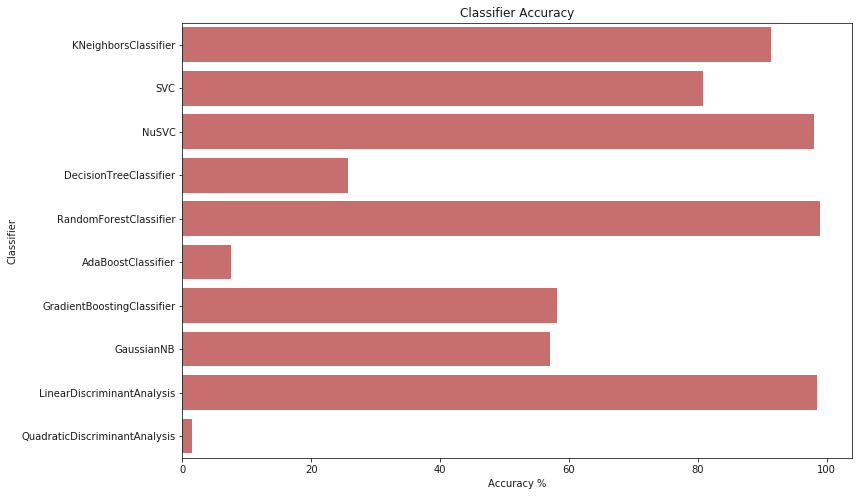

In [347]:
plt.figure(figsize=(12,8))
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="r")
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

In [348]:
log

,Classifier,Accuracy,Log Loss
0,KNeighborsClassifier,91.414141,1.568838
0,SVC,80.808081,4.309221
0,NuSVC,97.979798,2.274299
0,DecisionTreeClassifier,25.757576,6.085389
0,RandomForestClassifier,98.989899,0.737972
0,AdaBoostClassifier,7.575758,4.595045
0,GradientBoostingClassifier,58.080808,2.801577
0,GaussianNB,57.070707,14.827252
0,LinearDiscriminantAnalysis,98.484848,0.987728
0,QuadraticDiscriminantAnalysis,1.515152,34.015462


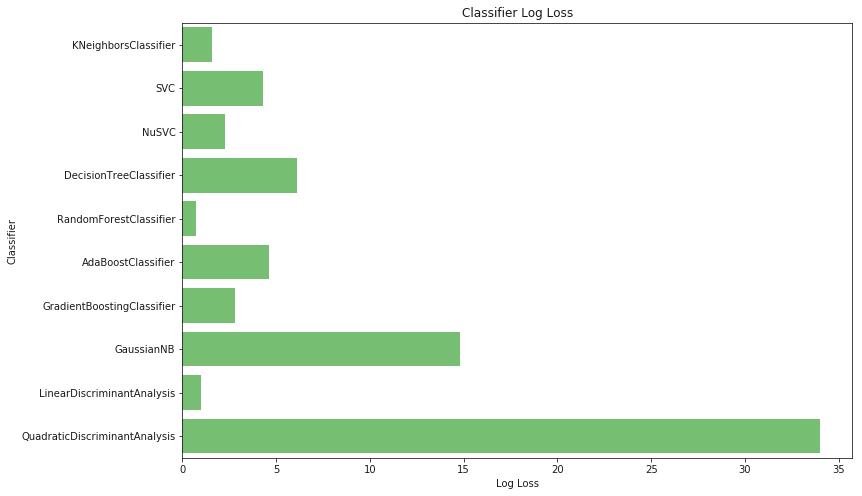

In [346]:
plt.figure(figsize=(12,8))
sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [138]:
# Predict Test Set
favorite_clf = LinearDiscriminantAnalysis()
favorite_clf.fit(X_train, y_train)
test_predictions = favorite_clf.predict_proba(test)

/Applications/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [139]:
X_train.shape

(792, 192)

In [140]:
X_test.shape

(198, 192)

In [141]:
pred = favorite_clf.predict(X_test)

In [142]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         2
          7       0.67      1.00      0.80         2
          8       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         2
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         2
         14       1.00      1.00      1.00         2
         15       1.00      1.00      1.00         2
         16       1.00      1.00      1.00         2
         17       1.00      0.50      0.67   

In [143]:
print(confusion_matrix(y_test,pred))

[[2 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 2 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 2 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 2]]


# putting everything in grid search mode
parameters =  "insert params dict here"

grid_obj = GridSearchCV(clf, parameters, scoring='log_loss')
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

In [144]:
# imports
import numpy as np                     # numeric python lib

import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour

from skimage import measure            # to find shape contour

In [145]:
import scipy.ndimage as ndi            # to determine shape centrality

In [146]:
# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots

In [147]:
import os

In [148]:
os.getcwd()

'/Users/pradmishra/Downloads/images'

In [160]:
os.chdir('/Users/pradmishra')

In [161]:
os.getcwd()

'/Users/pradmishra'

In [162]:
img = mpimg.imread('figure.jpg')

In [163]:
img

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ..., 
       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       

In [170]:
# using image processing module of scipy to find the center of the leaf
cx, cy, cz = ndi.center_of_mass(img)


In [171]:
img

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ..., 
       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       

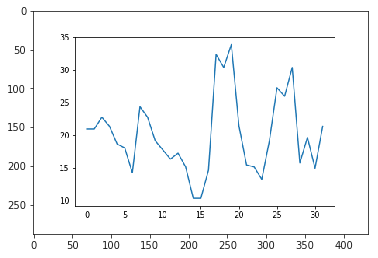

In [166]:
plt.imshow(img, cmap='Set3')  # show me the sample image

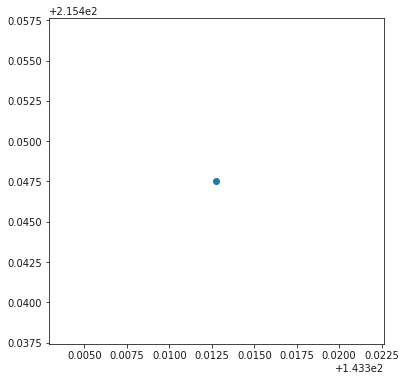

In [167]:
plt.scatter(cx, cy)           # show me its center
plt.show()

In [174]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
def fit_model(X,y):
    cv_sets = ShuffleSplit(X_train.shape[0],n_iter=10,test_size=0.20,random_state=1234)
    rf = RandomForestClassifier()
    params = {'criterion':('gini','entropy'),
              'max_depth':[2,3],
              'min_samples_split':[30,10],
             'max_features' : [4,5],
             'n_estimators' : [50,100]}
    grid = GridSearchCV(rf,params,cv=cv_sets)
    grid = grid.fit(X,y)
    return grid.best_estimator_

In [175]:
fit_model(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [176]:
nsimu = 21
accuracy = [0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rf = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rf.fit(X_train,y_train)
    rf_pred = rf.predict(X_test)
    cm = confusion_matrix(y_test,rf_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

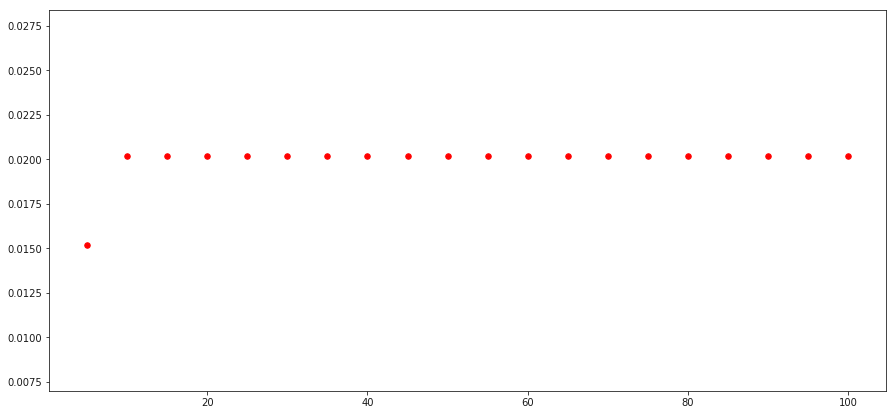

In [177]:
plt.figure(figsize=(15,7))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=30,c='red')
plt.show()

In [178]:
nsimu = 21
accuracy = [0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rf = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rf.fit(X_train,y_train)
    rf_pred = rf.predict(X_test)
    cm = confusion_matrix(y_test,rf_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

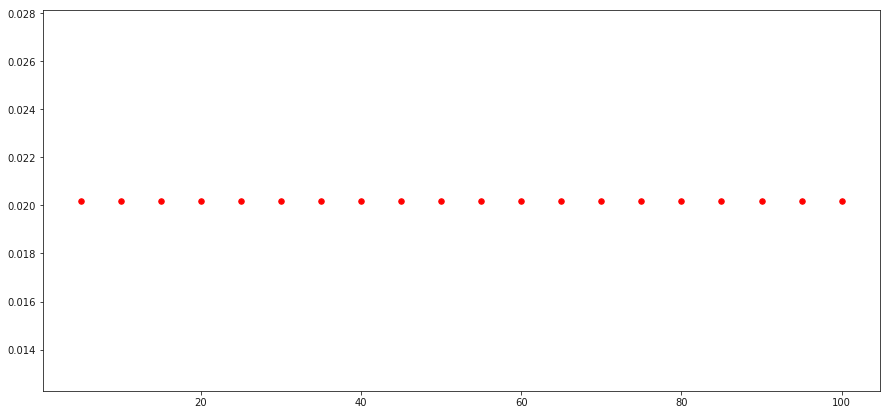

In [179]:
plt.figure(figsize=(15,7))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=30,c='red')
plt.show()

In [180]:
nsimu = 21
accuracy = [0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rf = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=10,criterion='entropy')
    rf.fit(X_train,y_train)
    rf_pred = rf.predict(X_test)
    cm = confusion_matrix(y_test,rf_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

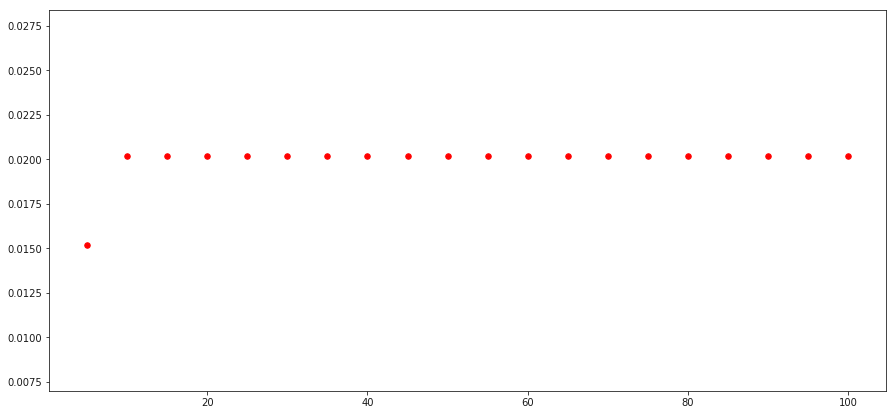

In [181]:
plt.figure(figsize=(15,7))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=30,c='red')
plt.show()

In [182]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
def fit_model(X,y):
    cv_sets = ShuffleSplit(X_train.shape[0],n_iter=5,test_size=0.20,random_state=1234)
    nnt = MLPClassifier()
    params = {'activation':('relu','logistic'),
              'hidden_layer_sizes':[2,3],
              'solver':('sgd','adam','lbfgs'),
             'max_iter' : [200,500],
             'alpha' : [0.0001,0.001,0.01]}
    grid = GridSearchCV(nnt,params,cv=cv_sets)
    grid = grid.fit(X,y)
    return grid.best_estimator_

In [172]:
#Next Step:
# Grid search for hyper paramter tuning
# TF - models
# CNN- for image classification

In [350]:
## Importing standard libraries
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#https://s3.amazonaws.com/hackerday.datascience/118/train.csv
#https://s3.amazonaws.com/hackerday.datascience/118/test.csv

In [352]:
## Measure execution time, becaus Kaggle cloud fluctuates  
import time
start = time.time()

In [353]:
## Importing sklearn libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit


In [354]:
## Keras Libraries for Neural Networks
from keras.models import Sequential
from keras.layers import Merge
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [355]:
## Read data from the CSV file
data = pd.read_csv('https://s3.amazonaws.com/hackerday.datascience/118/train.csv')
parent_data = data.copy()    ## Always a good idea to keep a copy of original data
ID = data.pop('id')

In [356]:
data.shape
data.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [357]:
## Since the labels are textual, so we encode them categorically

y = data.pop('species')
y = LabelEncoder().fit(y).transform(y)
print(y.shape)

(990,)


In [358]:
## Most of the learning algorithms are prone to feature scaling
## Standardising the data to give zero mean =)
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit(data).transform(data)
X = StandardScaler().fit(data).transform(data)
## normalizing does not help here; l1 and l2 allowed
## X = preprocessing.normalize(data, norm='l1')
print(X.shape)
X

(990, 192)


array([[-0.48661074, -0.13135701, -0.33095592, ..., -0.39487147,
        -0.65214311,  0.26239707],
       [-0.58560191, -0.73488047, -0.02856115, ..., -0.49497401,
         2.18166976,  0.13364087],
       [-0.58560191, -0.48340807, -0.48219201, ..., -0.52001246,
         0.83564129, -0.72463124],
       ..., 
       [-0.78358426, -0.63430181, -1.23821765, ...,  0.1807566 ,
        -0.65214311, -0.76756462],
       [-0.88257543, -0.73488047,  0.5762671 , ..., -0.52001246,
        -0.51045972, -0.72463124],
       [ 0.30542003, -0.23196142, -0.02856115, ...,  0.08065405,
         1.18988604,  0.13364087]])

In [359]:
## We will be working with categorical crossentropy function
## It is required to further convert the labels into "one-hot" representation

y_cat = to_categorical(y)
print(y_cat.shape)

(990, 99)


In [360]:
## retain class balances
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=12345)
train_index, val_index = next(iter(sss.split(X, y)))
x_train, x_val = X[train_index], X[val_index]
y_train, y_val = y_cat[train_index], y_cat[val_index]
print("x_train dim: ",x_train.shape)
print("x_val dim:   ",x_val.shape)

x_train dim:  (792, 192)
x_val dim:    (198, 192)


In [361]:
## Developing a layered model for Neural Networks
## Input dimensions should be equal to the number of features
## We used softmax layer to predict a uniform probabilistic distribution of outcomes
## https://keras.io/initializations/ ;glorot_uniform, glorot_normal, lecun_uniform, orthogonal,he_normal
# DNN- Deep Neural Network
model = Sequential()
model.add(Dense(768,input_dim=192,  init='glorot_normal', activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(768, activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(99, activation='softmax'))

In [371]:
## Error is measured as categorical crossentropy or multiclass logloss
## Adagrad, rmsprop, SGD, Adadelta, Adam, Adamax, Nadam

#model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics = ["accuracy"])
model.compile(loss='categorical_crossentropy',optimizer='adagrad', metrics = ["accuracy"])
#model.compile(loss='categorical_crossentropy',optimizer='sgd', metrics = ["accuracy"])
#model.compile(loss='categorical_crossentropy',optimizer='adadelta', metrics = ["accuracy"])
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics = ["accuracy"])
#model.compile(loss='categorical_crossentropy',optimizer='adamax', metrics = ["accuracy"])
#model.compile(loss='categorical_crossentropy',optimizer='Nadam', metrics = ["accuracy"])

In [372]:
## Fitting the model on the whole training data with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(x_train, y_train,batch_size=192,nb_epoch=250 ,verbose=0,
                    validation_data=(x_val, y_val),callbacks=[early_stopping])

In [373]:
## we need to consider the loss for final submission to leaderboard
## print(history.history.keys())
print('val_acc: ',max(history.history['val_acc']))
print('val_loss: ',min(history.history['val_loss']))
print('train_acc: ',max(history.history['acc']))
print('train_loss: ',min(history.history['loss']))

print()
print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

val_acc:  0.994949514216
val_loss:  0.0375406473706
train_acc:  1.0
train_loss:  7.1233824642e-06

train/val loss ratio:  0.000189751188728


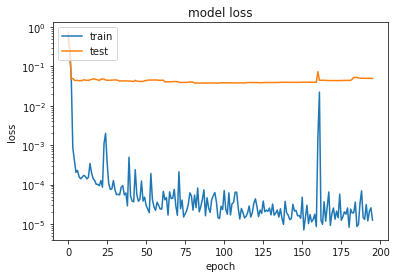

In [374]:
## summarize history for loss
## Plotting the loss with the number of iterations
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

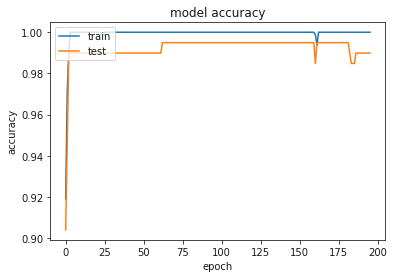

In [375]:
## Plotting the error with the number of iterations
## With each iteration the error reduces smoothly
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [376]:
## read test file
test = pd.read_csv('https://s3.amazonaws.com/hackerday.datascience/118/test.csv')
index = test.pop('id')

## we need to perform the same transformations from the training set to the test set
test = preprocessing.MinMaxScaler().fit(test).transform(test)
test = StandardScaler().fit(test).transform(test)
yPred = model.predict_proba(test)

512/594 [========================>.....] - ETA: 0s

In [377]:
yPred = pd.DataFrame(yPred,index=index,columns=sort(parent_data.species.unique()))

In [378]:
yPred

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,1.100567e-13,4.523121e-12,8.577789e-17,9.206923e-10,8.285942e-12,1.509020e-15,2.958439e-14,3.824437e-15,1.134421e-13,6.414147e-13,...,3.282422e-14,1.786060e-09,2.646354e-14,9.859845e-16,1.019394e-12,3.116100e-13,5.175158e-17,3.606400e-16,1.711030e-11,6.657540e-18
7,7.021929e-18,4.000996e-15,2.441575e-14,4.769028e-13,5.807748e-16,5.097615e-15,1.225808e-11,9.464514e-18,2.444483e-14,1.207861e-14,...,4.190795e-14,1.234934e-15,9.432256e-18,4.393622e-19,2.914992e-21,7.358572e-13,7.247904e-16,3.402543e-12,1.270131e-16,3.994680e-16
9,6.582326e-10,9.985359e-01,9.144836e-12,2.812427e-11,1.459809e-03,2.409311e-07,8.945187e-12,6.738888e-09,8.271952e-08,3.784165e-08,...,3.697578e-11,7.241681e-13,3.333965e-11,1.411578e-13,2.276031e-15,3.934525e-12,3.051722e-13,4.054768e-17,1.650489e-11,8.774527e-09
12,1.187742e-11,8.054749e-06,1.798010e-08,4.362862e-12,9.735817e-11,4.675951e-10,7.807548e-06,4.654334e-08,1.043819e-08,3.076497e-06,...,4.297972e-10,1.024196e-11,3.386231e-09,5.864905e-09,1.580573e-12,1.164487e-07,1.359063e-03,1.024508e-08,5.079954e-12,9.817265e-06
13,8.051978e-13,2.111511e-12,7.767755e-17,4.316340e-16,1.290511e-14,1.377246e-15,1.163136e-11,1.870398e-13,1.789570e-09,2.881625e-10,...,2.703658e-09,3.289086e-14,1.281434e-09,1.899380e-15,1.057438e-08,2.947929e-11,3.402397e-07,4.202475e-10,8.195366e-12,3.720808e-14
16,2.825657e-08,6.422120e-14,2.344162e-11,9.966781e-01,2.436027e-15,5.843078e-15,3.982535e-12,1.302257e-10,3.335089e-11,1.306973e-16,...,8.187264e-08,6.993604e-09,9.171115e-07,3.584030e-12,1.666134e-09,9.215131e-08,2.484089e-10,5.835687e-10,5.496554e-06,3.787366e-09
19,2.033156e-11,4.091485e-13,8.987290e-13,1.000000e+00,5.168866e-17,6.239816e-17,1.459896e-14,1.184547e-13,3.144879e-14,1.300444e-17,...,1.006810e-11,5.945090e-12,3.358122e-11,1.334341e-14,3.279488e-14,1.488782e-09,1.030237e-15,4.863621e-15,4.026451e-11,7.848215e-10
23,1.033839e-15,1.296051e-09,3.457072e-13,2.803559e-10,2.212990e-13,2.522819e-07,4.833309e-10,1.047781e-11,4.771951e-15,4.507790e-12,...,4.628704e-13,1.314124e-14,8.438073e-13,3.717702e-12,1.499137e-11,1.288701e-15,1.544091e-17,1.991993e-16,8.668355e-15,1.697510e-12
24,1.100359e-11,1.704271e-13,5.128198e-15,1.090811e-15,2.639401e-12,6.217043e-13,1.299702e-14,1.085316e-14,1.165164e-08,2.907105e-15,...,4.001051e-14,7.426835e-16,4.766542e-18,6.818104e-17,7.135447e-18,7.726076e-12,4.496066e-18,4.528057e-21,1.178677e-18,7.821341e-19
